# Importing liberaries and Dataset


In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
df=pd.read_excel('D:\Data Analysis\Project3\source\sales_data (1).xlsx')


# Data Wrangling

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      15000 non-null  int64         
 1   Order ID        15000 non-null  int64         
 2   Employee Name   15000 non-null  object        
 3   Sales Team      15000 non-null  object        
 4   Distributors    15000 non-null  object        
 5   Channels        15000 non-null  object        
 6   Customers       15000 non-null  object        
 7   Area            15000 non-null  object        
 8   State           15000 non-null  object        
 9   Product         15000 non-null  object        
 10  Product Class   15000 non-null  object        
 11  Sales Quantity  15000 non-null  int64         
 12  Unit Price      15000 non-null  float64       
 13  Order Date      15000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)


In [153]:
# drop unnamed column
df.drop(axis=1,columns='Unnamed: 0',inplace=True)


In [155]:
# creating total sales column
df.columns
df['Total Sales']=df['Sales Quantity']*df['Unit Price']

In [157]:
# creating year column
df['Year']=df['Order Date'].dt.year

In [159]:
#checking for 
df.isna().sum()

Order ID          0
Employee Name     0
Sales Team        0
Distributors      0
Channels          0
Customers         0
Area              0
State             0
Product           0
Product Class     0
Sales Quantity    0
Unit Price        0
Order Date        0
Total Sales       0
Year              0
dtype: int64

In [161]:
#check for duplicates
df.duplicated().sum()

0

In [163]:
#converting odrder id to object
df['Order ID']=df['Order ID'].astype('str')

### Exploring Categorical and Numerical Columns

In [166]:
cat_df=df.select_dtypes(include='object')
cat_df.describe()
cat_df.drop(columns='Order ID',inplace=True)
num_df=df.select_dtypes(include='number')
num_df.describe().round(0)


,Sales Quantity,Unit Price,Total Sales,Year
count,15000.0,15000.0,15000.0,15000.0
mean,575.0,24.0,13498.0,2022.0
std,274.0,9.0,8581.0,1.0
min,108.0,10.0,1131.0,2021.0
25%,352.0,17.0,6888.0,2021.0
50%,549.0,22.0,11450.0,2022.0
75%,760.0,31.0,18175.0,2023.0
max,1388.0,38.0,51706.0,2024.0


In [168]:
for col in cat_df.columns:
    print(col)
    print(cat_df[col].nunique())
    print(cat_df[col].unique())
    print('-'*30)
    

Employee Name
14
['Otto Weiser' 'Clara Weiss' 'John Müller' 'Anna Fischer' 'Sarah Berger'
 'Stefan Herzog' 'Emma Schreiber' 'Eva Klein' 'Lukas Schwarz' 'Jan Müller'
 'Peter Müller' 'Max Schmidt' 'Hans Zimmer' 'Lisa Roth']
------------------------------
Sales Team
3
['Team C' 'Team B' 'Team A']
------------------------------
Distributors
7
['MediDistrib' 'PharmaTech' 'MediSupply' 'GesundMed' 'HealthPlus'
 'PharmaSuisse' 'BioPharma']
------------------------------
Channels
3
['Retail' 'Wholesale' 'Online']
------------------------------
Customers
252
['Jonas Meier' 'Mia Gruber' 'Sophie Wagner' 'Lisa Schmidt' 'Anna Wagner'
 'David Schüler' 'Nina Schüler' 'Nina Weber' 'Lukas Schmidt' 'Laura Hofer'
 'Nina Gruber' 'Emily Hofer' 'David Müller' 'Tim Schmidt' 'Emily Gruber'
 'Mia Klein' 'Paul Hofer' 'Max Bauer' 'Emily Schmidt' 'David Klein'
 'Jakob Schneider' 'Laura Schmidt' 'Jakob Friedrich' 'Sophie Hofmann'
 'Tim Schüler' 'Laura Hofmann' 'Lukas Fischer' 'Jonas Klein'
 'Lukas Schüler' 'Max Sch

array([[<Axes: title={'center': 'Sales Quantity'}>,
        <Axes: title={'center': 'Unit Price'}>],
       [<Axes: title={'center': 'Total Sales'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

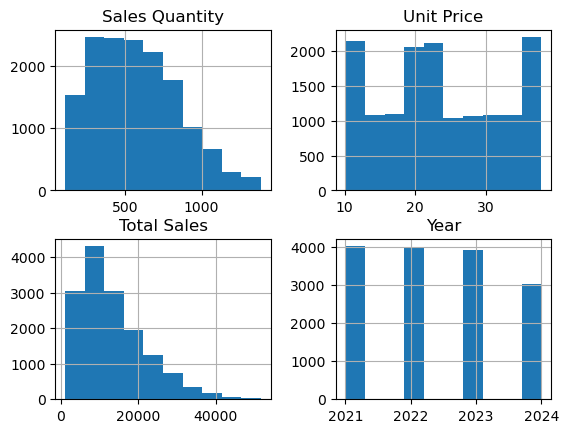

In [170]:
num_df.hist()

<Axes: >

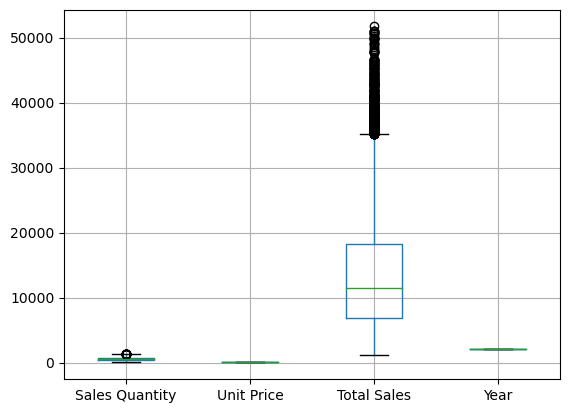

In [172]:
num_df.boxplot()

# EDA

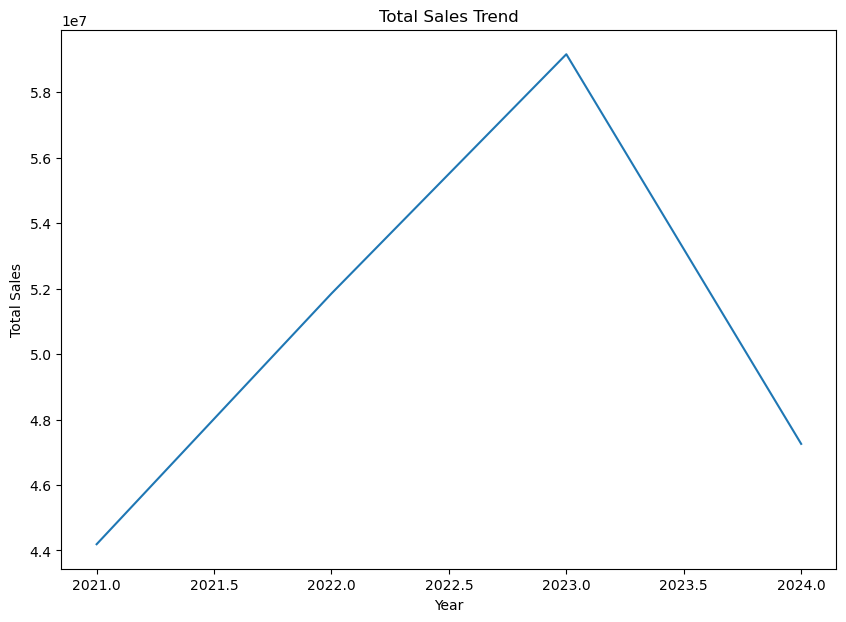

In [174]:
# Sales Trend
sales_trend=df.groupby('Year')['Total Sales'].sum().reset_index()
plt.figure(figsize=(10,7))
sns.lineplot(data=sales_trend, x='Year', y='Total Sales')
plt.title('Total Sales Trend')
plt.show()

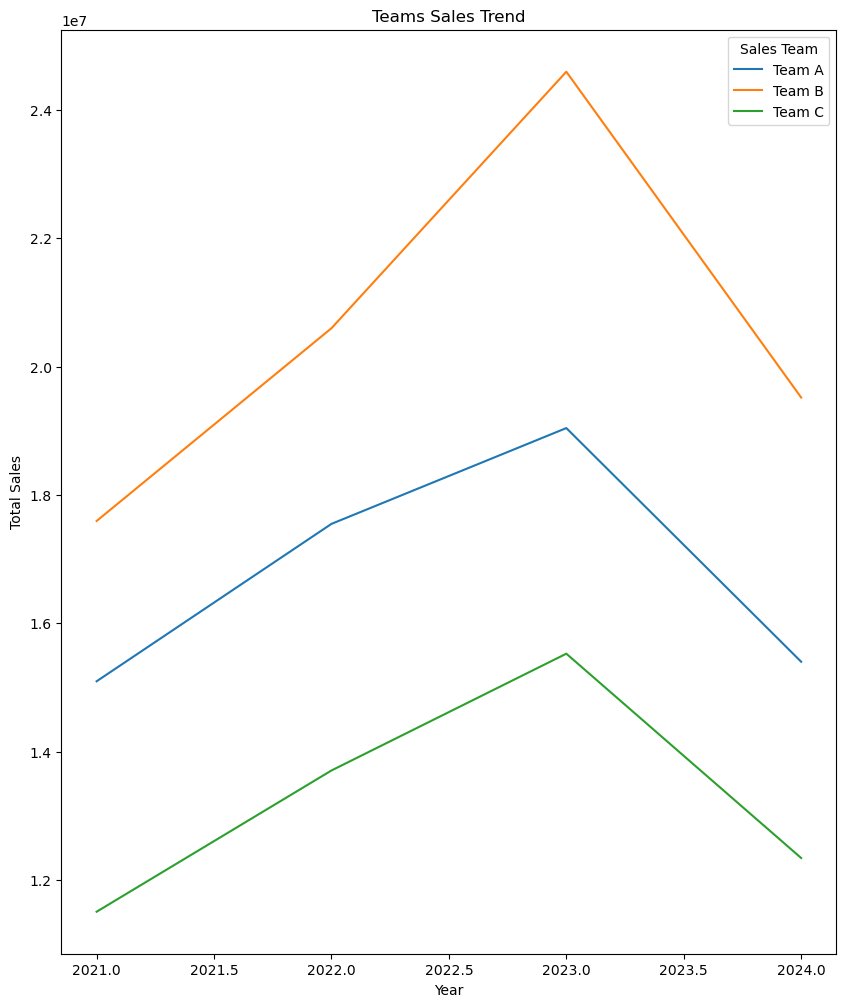

In [176]:
# sales per team
sales_teams=df.groupby(['Sales Team','Year'])['Total Sales'].sum().reset_index()
plt.figure(figsize=(10,12))
sns.lineplot(data=sales_teams, x='Year', y='Total Sales', hue='Sales Team')
plt.title('Teams Sales Trend')
plt.show()

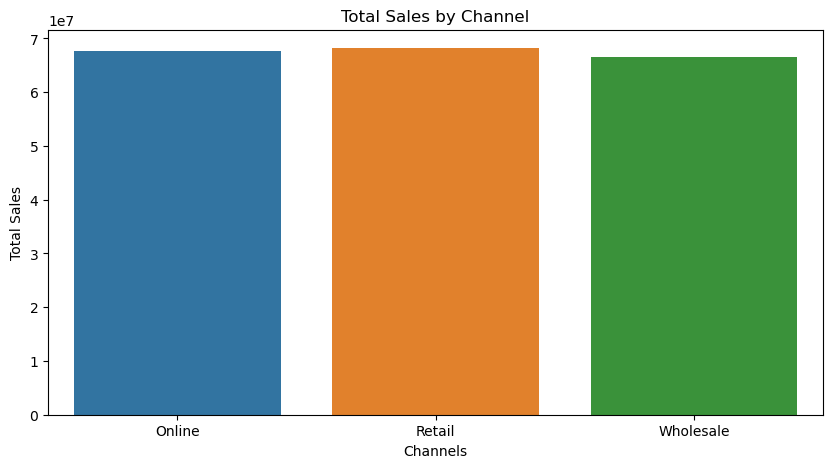

In [178]:
# Sales by Channel
ch_sales=df.groupby('Channels')['Total Sales'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=ch_sales, x='Channels', y='Total Sales')
plt.title('Total Sales by Channel')
plt.show()

In [180]:
df.columns

Index(['Order ID', 'Employee Name', 'Sales Team', 'Distributors', 'Channels',
       'Customers', 'Area', 'State', 'Product', 'Product Class',
       'Sales Quantity', 'Unit Price', 'Order Date', 'Total Sales', 'Year'],
      dtype='object')

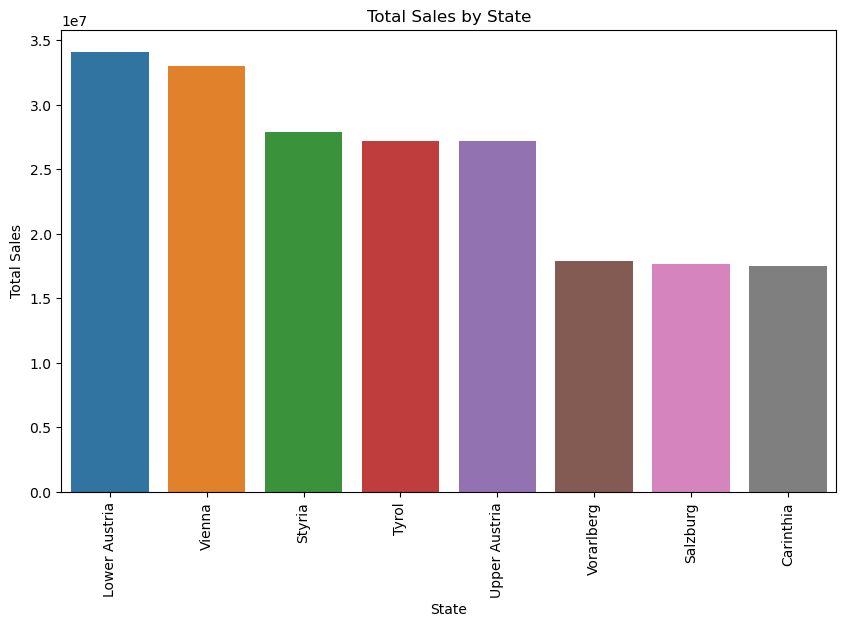

In [182]:
# Sales by State
st_sales=df.groupby('State')['Total Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=st_sales, x='State', y='Total Sales')
plt.title('Total Sales by State')
plt.xticks(rotation=90)
plt.show()

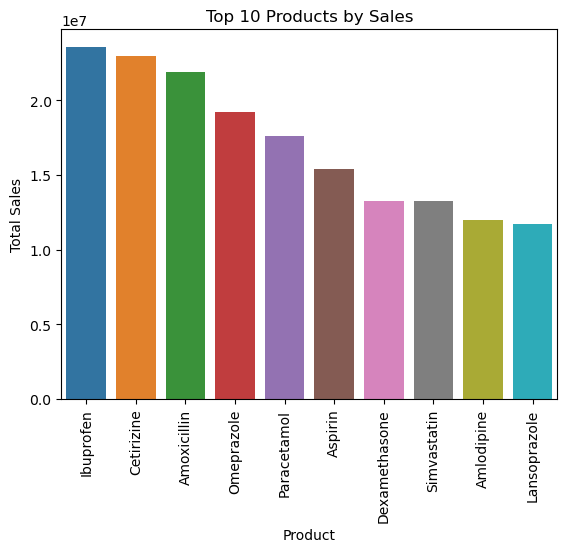

In [184]:
# top 10 products by sales over years
product_sales=df.groupby('Product')['Total Sales'].sum().nlargest(10).reset_index()
sns.barplot(data= product_sales, x='Product', y='Total Sales')
plt.title('Top 10 Products by Sales')
plt.xticks(rotation=90)
plt.show()

### Uploading Target File

In [188]:
target=pd.read_excel('D:\Data Analysis\Project3\source\sales_data (1).xlsx', sheet_name='Sheet3')
target.drop(columns='Unnamed: 0',inplace=True)
target.columns

Index(['Employee Name', 'Sales Team', 'Year', 'Target', 'Achievement'], dtype='object')

In [190]:
# 2024 teams target vs sales
target_teams=target.groupby(['Sales Team','Year']).agg({'Target':'sum','Achievement':'sum'}).reset_index()
target_teams24=target_teams.query('Year == 2024')
target_teams24['Ach%']=target_teams24['Achievement']/target_teams24['Target']
target_teams24

,Sales Team,Year,Target,Achievement,Ach%
3,Team A,2024,22813125,15399123.28,0.675012
7,Team B,2024,27375750,19518688.14,0.712992
11,Team C,2024,18250500,12339287.23,0.676107


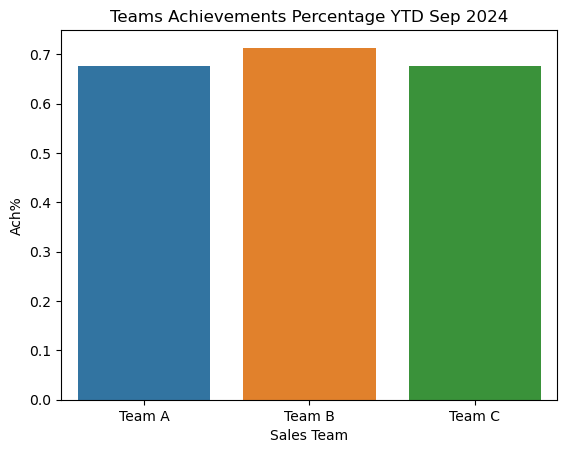

In [192]:
sns.barplot(data=target_teams24, x='Sales Team', y='Ach%')
plt.title('Teams Achievements Percentage YTD Sep 2024')
plt.show()

In [194]:
# Rep 2024 YTD sep 2024
rep_target=target.groupby(['Employee Name','Year']).agg({'Target':'sum','Achievement':'sum'}).reset_index()
rep_target=rep_target.query('Year == 2024')
rep_target['Ach%']=rep_target['Achievement']/rep_target['Target']
rep_target=rep_target.sort_values('Ach%',ascending=False)

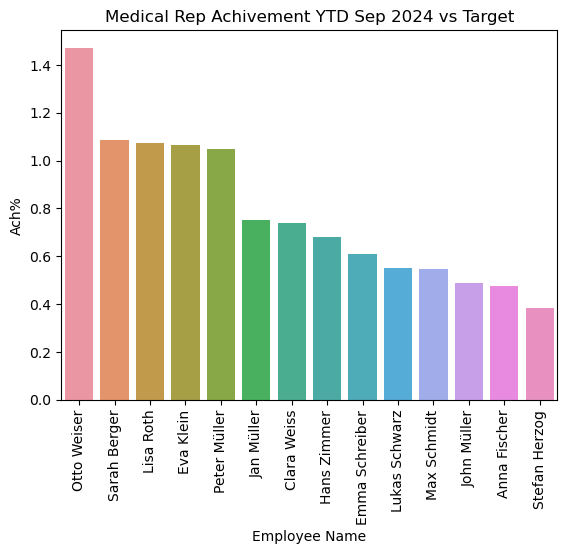

In [196]:
sns.barplot(data=rep_target, x='Employee Name', y='Ach%')
plt.title('Medical Rep Achivement YTD Sep 2024 vs Target')
plt.xticks(rotation=90)
plt.show()

# Investigating on Reps Achieving less than 60% of Target

In [199]:
#rep_target.query('Ach% < 0.6')
rep_target[rep_target['Ach%']<0.6]


,Employee Name,Year,Target,Achievement,Ach%
35,Lukas Schwarz,2024,4879506,2698370.06,0.553001
39,Max Schmidt,2024,5692230,3124729.61,0.548946
27,John Müller,2024,6422624,3134931.00,0.488108
3,Anna Fischer,2024,6812357,3232559.04,0.474514
55,Stefan Herzog,2024,8189019,3156770.91,0.385488


In [219]:
# investigating historical performance
rep_under=target[target['Employee Name'].isin(['Lukas Schwarz','Max Schmidt','John Müller','Anna Fischer','Stefan Herzog'])]
rep_under['Ach%']=rep_under['Achievement']/rep_under['Target']
rep_under


,Employee Name,Sales Team,Year,Target,Achievement,Ach%
0,Max Schmidt,Team A,2021,3490201,3172402.20,0.908945
1,John Müller,Team A,2021,2100599,2721421.82,1.295546
6,Stefan Herzog,Team B,2021,4622105,3665900.94,0.793124
10,Lukas Schwarz,Team C,2021,3134465,3136388.07,1.000614
13,Anna Fischer,Team C,2021,5021755,2701909.73,0.538041
14,Max Schmidt,Team A,2022,3777498,3688063.93,0.976325
15,John Müller,Team A,2022,2201282,3348986.02,1.521380
20,Stefan Herzog,Team B,2022,5007755,4334478.26,0.865553
24,Lukas Schwarz,Team C,2022,5055340,3234097.04,0.639739
27,Anna Fischer,Team C,2022,4989778,3677294.24,0.736966


In [203]:
rep_under.drop(columns=['Sales Team', 'Target', 'Achievement'], inplace=True)

In [211]:
rep_performance=rep_under.sort_values(['Employee Name','Year'])

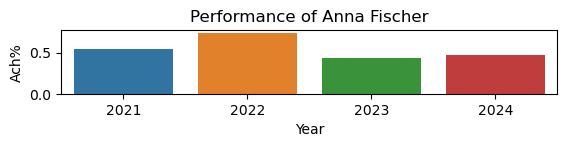

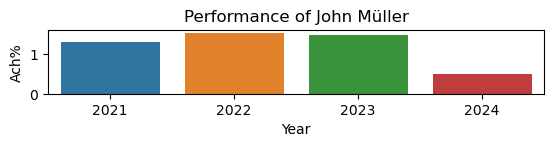

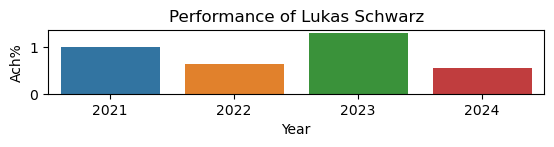

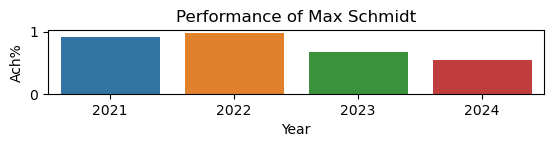

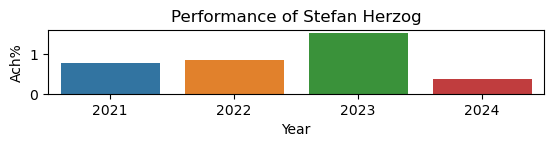

In [225]:
#plt.figure(figsize=(20,15))
for e,i in enumerate(rep_performance['Employee Name'].unique()):
    plt.subplot(5,1,e+1)
    rep_data=rep_performance[rep_performance['Employee Name']==i]
    sns.barplot(rep_data, x='Year', y='Ach%')
    plt.title('Performance of '+ i)
    #plt.tight_layout()
    plt.show()

Anna Fischer is underperforming for the last 4 years. We need to inspect her KPIs, also Target Adjustment was required.

Other Reps, We need to check Competitor Performance and the Total Market Status in there assigned Areas. 